In [24]:
import numpy as np
import pandas as pd
import xarray

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

In [16]:
def prep_regions(ds):
    """Preprocess TransCom Basis Map"""
    
    # Filter for land regions only
    ds = ds.where(ds.region < 12, drop=True)
    ds = ds.where(ds.region != 0, drop=True)
    
    return ds

In [18]:
DS_regions = xarray.open_mfdataset("../data/transcom3_basis_map.nc", preprocess=prep_regions)
DS_regions

<xarray.Dataset>
Dimensions:  (lat: 153, lon: 360)
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -77.5 -76.5 -75.5 -74.5 -73.5 ... 80.5 81.5 82.5 83.5
Data variables:
    region   (lat, lon) float32 dask.array<chunksize=(153, 360), meta=np.ndarray>

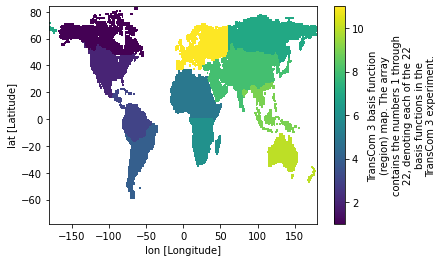

In [19]:
DS_regions.region.plot()

In [27]:
# Attempt to regrid

def regrid(ds, res=1, transcom=False):
    """
    Convert dataset to dataframe and assign coordinates to designated grid.
    """
    df = ds.to_dataframe().reset_index()
        
    # Establish grid
    lon_bins = np.arange(-180, 180+res, res)
    lat_bins = np.arange(-90, 90+res, res)
    lon_centers = (lon_bins[1:] + lon_bins[:-1]) / 2
    lat_centers = (lat_bins[1:] + lat_bins[:-1]) / 2

    # Overwrite lon-lat values with grid values
    df["lon"] = pd.cut(df.lon, lon_bins, labels=lon_centers).astype(float)
    df["lat"] = pd.cut(df.lat, lat_bins, labels=lat_centers).astype(float)
    
    return df

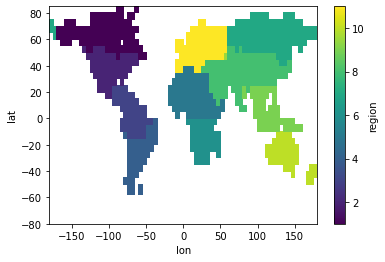

In [35]:
grid5 = regrid(DS_regions, res=5).groupby(["lon", "lat"]).median()
grid5.to_xarray().region.T.plot()